<div class="alert alert-block alert-info">

[1. The needed steps](#1st-bullet)<br>
- [1.1 Import the required libraries](#2nd-bullet)<br>
- [1.2 Load the datasets](#3rd-bullet)<br>

[2. Data Exploration](#2ed-bulet)<br>
- [2.1 Basic Data Exploration]()
    - [2.1.1 Examining the Dataset]()
    - [2.1.2 Statistical Summary]()
    - [2.1.3 Inspect Categorical Values]()
    - [2.1.4 Check for Missing & Duplicate Values]()
    - [2.1.5 Detect Outliers]()
- [2.2 Dataset Features Metadata](#4th-bullet)<br>
- [2.3 Visual Data Exploration](#4th-bullet)<br>
    - [2.3.1 Uni-variate Plots]()
        - [BoxPlots]()
        - [Histograms]()

[3. Data Pre-Processing](#4th-bullet)<br>
- [3.1 Data Partition]()
- [3.2 Data Cleansing]()
    - [3.2.1 Data Imputation]()
    - [3.2.2 Outliers Removal]()
    - [3.2.3 Avoid Typos]()
- [3.3 Feature Engineering]()
    - [3.3.1 DataType Transformation]()
    - [3.3.2 Feature Extraction]()
    - [3.3.3 Eliminate Irrelevant Variables]()
    - [3.3.4 Binning Numerical Features]()
- [3.4 Feature Scaling]()
    - [3.4.1 Data Normalization]()
    - [3.4.2 Data Standardization]()
    - [3.4.3 Comparing unscaled, normalized and standardized data]()
- [3.5 Feature Encoding]()
    - [3.5.1 Ordinal Encoding]()
    - [3.5.1 One-hot Encoding]()

[4. Feature Selection](#5th-bullet)<br>

</div>

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. The needed steps
</div>

<a class="anchor" id="2nd-bullet">

#### 1.1. Import the required libraries
</a>

In [2]:
#libraries imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import scipy.stats as stats

import os

<a class="anchor" id="2nd-bullet">

#### 1.2 Load The Datasets
</a>

In [3]:
# load the data sets
df_demo = pd.read_excel('datasets/train_demo.xlsx')
df_health = pd.read_excel('datasets/train_health.xlsx')
df_habits = pd.read_excel('datasets/train_habits.xlsx')
df = df_demo.merge(df_health)
df = df.merge(df_habits)

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 2. Data Exploration
</div>

Exploratory Data Analysis __(EDA)__, is the process of examining and understanding the structure of a dataset. It's a critical part of any machine learning project, and helps to approach data and get comfortable with all sorts of its characteristics.

<a class="anchor" id="2nd-bullet">

#### 2.1 Basic Exploration (Coherence check)
- Find inconsistent values,
- Missing Values,
- Outliers
- Any other problem you may find in your dataset
</a>

__`2.1.1`__ __Examining the DataSet__

__`head()`__ method check the first five rows of our dataset.
__`info()`__ method check the data types of the variables of our dataset and if there are any missing values.


In [4]:
# dataset head
df.head(10)

,PatientID,Name,Birth_Year,Region,Education,Disease,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter
5,1653,Mr. David Lamothe,1966,East Midlands,NaN,0,167,49,287,130,7,7,Not sure,Neither I nor my immediate family have diabetes.,Yes,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
6,1422,Mrs. Patricia Byrne,1965,Yorkshire and the Humber,High School Graduate,1,158,63,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Less than half a liter
7,1806,Mr. Wesley Shoemaker,1965,West Midlands,High School Graduate,0,178,67,280,150,9,2,Less than 3 years but more than 1 year,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,1 to 2 pieces of fruit in average,More than half a liter but less than one liter
8,1703,Mr. Billy Kirkland,1965,East of England,High School Graduate,1,162,63,205,110,12,7,Less than 3 years but more than 1 year,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
9,1370,Mrs. Tina Morris,1979,East Midlands,High School Graduate,0,154,51,345,132,14,14,Not sure,Neither I nor my immediate family have diabetes.,Yes,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PatientID         800 non-null    int64 
 1   Name              800 non-null    object
 2   Birth_Year        800 non-null    int64 
 3   Region            800 non-null    object
 4   Education         787 non-null    object
 5   Disease           800 non-null    int64 
 6   Height            800 non-null    int64 
 7   Weight            800 non-null    int64 
 8   High_Cholesterol  800 non-null    int64 
 9   Blood_Pressure    800 non-null    int64 
 10  Mental_Health     800 non-null    int64 
 11  Physical_Health   800 non-null    int64 
 12  Checkup           800 non-null    object
 13  Diabetes          800 non-null    object
 14  Smoking_Habit     800 non-null    object
 15  Drinking_Habit    800 non-null    object
 16  Exercise          800 non-null    object
 17  Fruit_Habit     

__`2.1.2`__ __Statistical Summary__

__`describe()`__ method give us a birds-eye view of our data. Get the main descriptive statistics for all the variables.

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientID,800.0,NaN,NaN,NaN,1513.99875,300.87463,1001.0,1247.5,1519.5,1777.25,2024.0
Name,800,799,Mr. Gary Miller,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birth_Year,800.0,NaN,NaN,NaN,1966.04375,15.421872,1855.0,1961.0,1966.0,1974.0,1993.0
Region,800,10,East Midlands,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,787,6,University Complete (3 or more years),239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Disease,800.0,NaN,NaN,NaN,0.51375,0.500124,0.0,0.0,1.0,1.0,1.0
Height,800.0,NaN,NaN,NaN,167.80625,7.976888,151.0,162.0,167.0,173.0,180.0
Weight,800.0,NaN,NaN,NaN,67.8275,12.11347,40.0,58.0,68.0,77.0,97.0
High_Cholesterol,800.0,NaN,NaN,NaN,249.3225,51.566631,130.0,213.75,244.0,280.0,568.0
Blood_Pressure,800.0,NaN,NaN,NaN,131.05375,17.052693,94.0,120.0,130.0,140.0,200.0


__`2.1.3`__ __Inspect Categorical Values__

__`describe(include =['O'] `__ method give us the descriptive statistics for categorical data.

In [7]:
df.describe(include=['O']).T

,count,unique,top,freq
Name,800,799,Mr. Gary Miller,2
Region,800,10,East Midlands,154
Education,787,6,University Complete (3 or more years),239
Checkup,800,4,More than 3 years,429
Diabetes,800,4,Neither I nor my immediate family have diabetes.,392
Smoking_Habit,800,2,No,673
Drinking_Habit,800,3,I usually consume alcohol every day,406
Exercise,800,2,No,536
Fruit_Habit,800,5,Less than 1. I do not consume fruits every day.,452
Water_Habit,800,3,Between one liter and two liters,364


__`2.1.4`__ __Check for Missing & Duplicate Values__

__`isnull`__ & __`isna`__ methods detects nullable and missing values.
__`duplicated`__ method returns boolean Series denoting duplicate rows

In [8]:
# check for nan/null
df.isnull().values.any()

True

In [9]:
# count of missing values
df.isna().sum()

PatientID            0
Name                 0
Birth_Year           0
Region               0
Education           13
Disease              0
Height               0
Weight               0
High_Cholesterol     0
Blood_Pressure       0
Mental_Health        0
Physical_Health      0
Checkup              0
Diabetes             0
Smoking_Habit        0
Drinking_Habit       0
Exercise             0
Fruit_Habit          0
Water_Habit          0
dtype: int64

In [10]:
# duplicated observations
df.duplicated().sum()

0

__`2.1.5`__ __Detect Outliers__

The most common methods for detecting outliers by

- [__empirical rule / 68-95-99.7 rule__](https://en.wikipedia.org/wiki/68–95–99.7_rule) 99.7% of all data in a normal distribution lies within three standard deviations of the mean so any value lie outside +/- 3 standard deviations consider as outlier.

- [__IQR Rule__](https://en.wikipedia.org/wiki/Interquartile_range) For Any value that is 1.5 x IQR greater than the third quartile is designated as an outlier and any value that is 1.5 x IQR less than the first quartile is also designated as an outlier.+/- 3 standard deviations in our dataset.

__`detect_outliers_empirical`__ function can identify outliers +/- 3 standard deviations in our dataset.

__`detect_outliers_iqr`__ function can identify outliers using IQR method.


In [11]:
def detect_outliers_empirical(df_copy):
    """Identify the number of outliers +/- 3 standard deviations."""

    outliers_summary = {}
    outliers = {}
    metrics = df_copy.select_dtypes(include=np.number).columns.tolist()

    for metric in metrics:

        # calculate summary statistics
        data_mean, data_std = np.mean(df_copy[metric]), np.std(df_copy[metric])

        # identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        outlier = [x for x in df_copy[metric] if x < lower or x > upper]
        if len(outlier) > 0 :
            outliers[metric] = outlier
            outliers_summary[metric] = len(outlier)

    return [outliers_summary, outliers]

In [12]:
summary_emp, outs_emp = detect_outliers_empirical(df)
summary_emp

{'Birth_Year': 12,
 'High_Cholesterol': 9,
 'Blood_Pressure': 6,
 'Mental_Health': 4,
 'Physical_Health': 8}

In [13]:
def detect_outliers_iqr(df):
    """Identify the  outliers by IQR rule."""

    metrics = df.select_dtypes(include=np.number).columns.tolist()

    q25 = df.quantile(.25)
    q75 = df.quantile(.75)
    iqr = (q75 - q25)

    upper_lim = q75 + 1.5 * iqr
    lower_lim = q25 - 1.5 * iqr

    outliers_summary = {}
    outliers = {}
    for metric in metrics:
        llim = lower_lim[metric]
        ulim = upper_lim[metric]
        outlier = [x for x in df[metric] if x < llim or x > ulim]
        if len(outlier) > 0 :
            outliers[metric] = outlier
            outliers_summary[metric] = len(outlier)

    return [outliers_summary, outliers]

In [14]:
summary_iqr, outs_iqr = detect_outliers_iqr(df)
summary_iqr

{'Birth_Year': 12,
 'High_Cholesterol': 11,
 'Blood_Pressure': 19,
 'Mental_Health': 4,
 'Physical_Health': 25}

By calling the `detect_outliers(df)` method, we can detect outliers in our dataset, So before deciding to drop or keeps them we need to investigate __the nature of the outlier__:
- `High Chrolesterol` & `Blood Presure` - It is obvious that it's an outlier for a legitimate reason and by performing additional examination found that both  outliers even its high measurements but still acceptable, as these records could be influential to the model keeping them is mandatory.
- `Mental Health` & `Physical Health`: It is obvious that it's an outlier for a legitimate reason as well, some patients didn't have days with mental health and were very active in last 30 days, on the other side some patients been in physical illness or injury most of the time in last 30 days. as these records could be influential to the model keeping them is mandatory.
- `Birth Year`: Drop irrelevant outliers as it's really positive mistaken.

<a class="anchor" id="2nd-bullet">

#### 2.2 Features Metadata
</a>

Now that we’ve got our data set up, we should spend some time exploring it and understanding what feature each column represents.

| #   | Feature	 | Type	     | Description	             |
|-----|----------|-----------|--------------------------|
| 1   | PatientID	        | 	Integer  | Id number - Index        |
| 2   | Name	        | Nominal	  | Patient's Name	          |
| 3	  | Birth_Year	        | 	Integer  | Max=1993, min=1855	      |
| 4	  | Region	        | Nominal	  | 10 diiferent values	     |
| 5	  | Education	        | Nominal 	 | 6 different values       |
| 6	  | Disease	        | Integer	  | Binary                   |
| 7	  | Height	        | Integer   | In cm, max=180, min=151	 |
| 8	  | Weight	        | Integer	  | In Kg, max=97, min=40    |
| 9	  | High_Cholesterol	        | Integer	  | Max=568, min=130         |
| 10  | Blood_Pressure	        | Integer	  | Max=200, min=94          |
| 11  | Mental_Health	        | Integer	  | In days, max=29, min=0   |
| 12  | Physical_Health	        | Integer	  | In days, max=30, min=0   |
| 13  | Checkup	        | Nominal	  | 4 different values       |
| 14  | Diabetes	        | Nominal	  | 4 different values       |
| 15  | Smoking_Habit	        | Nominal	  | (1) Yes (2) No           |
| 16  | Drinking_Habit	        | Nominal	  | 3 different values       |
| 17  | Exercise	        | Nominal	  | (1)	Yes (2) No           |
| 18  | Fruit_Habit	        | Nominal	  | 5 different values       |
| 19  | Water_Habit	        | Nominal	  | 3 different values       |

After the initially analyzing for the columns, we can conclude that the following observations can be removed:
- `PatientID` - Randomly generated field for unique identification purposes only.
- `Name` - Patient names long text explanation for the loan that we won’t need.

<a class="anchor" id="2nd-bullet">

#### 2.3 Visual Data Exploration
</a>

Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more.

In [15]:
# Define metric and non-metric features.
metric_features = df.select_dtypes(include=np.number).columns.tolist()
non_metric_features = df.columns.drop(metric_features).to_list()

__`2.3.1`__ __Uni-variate Plots__

These plots show every observation in data and provide information about the distribution of the observations on a single data variable.

__`Box Plots`__
A box plot takes a single variable and displays information regarding how the data is distributed throughout its quartiles, which essentially means dividing the data into quarters.

Let's start by looking at __`Numeric Variables' Uni-variate Distribution`__ in the dataset.

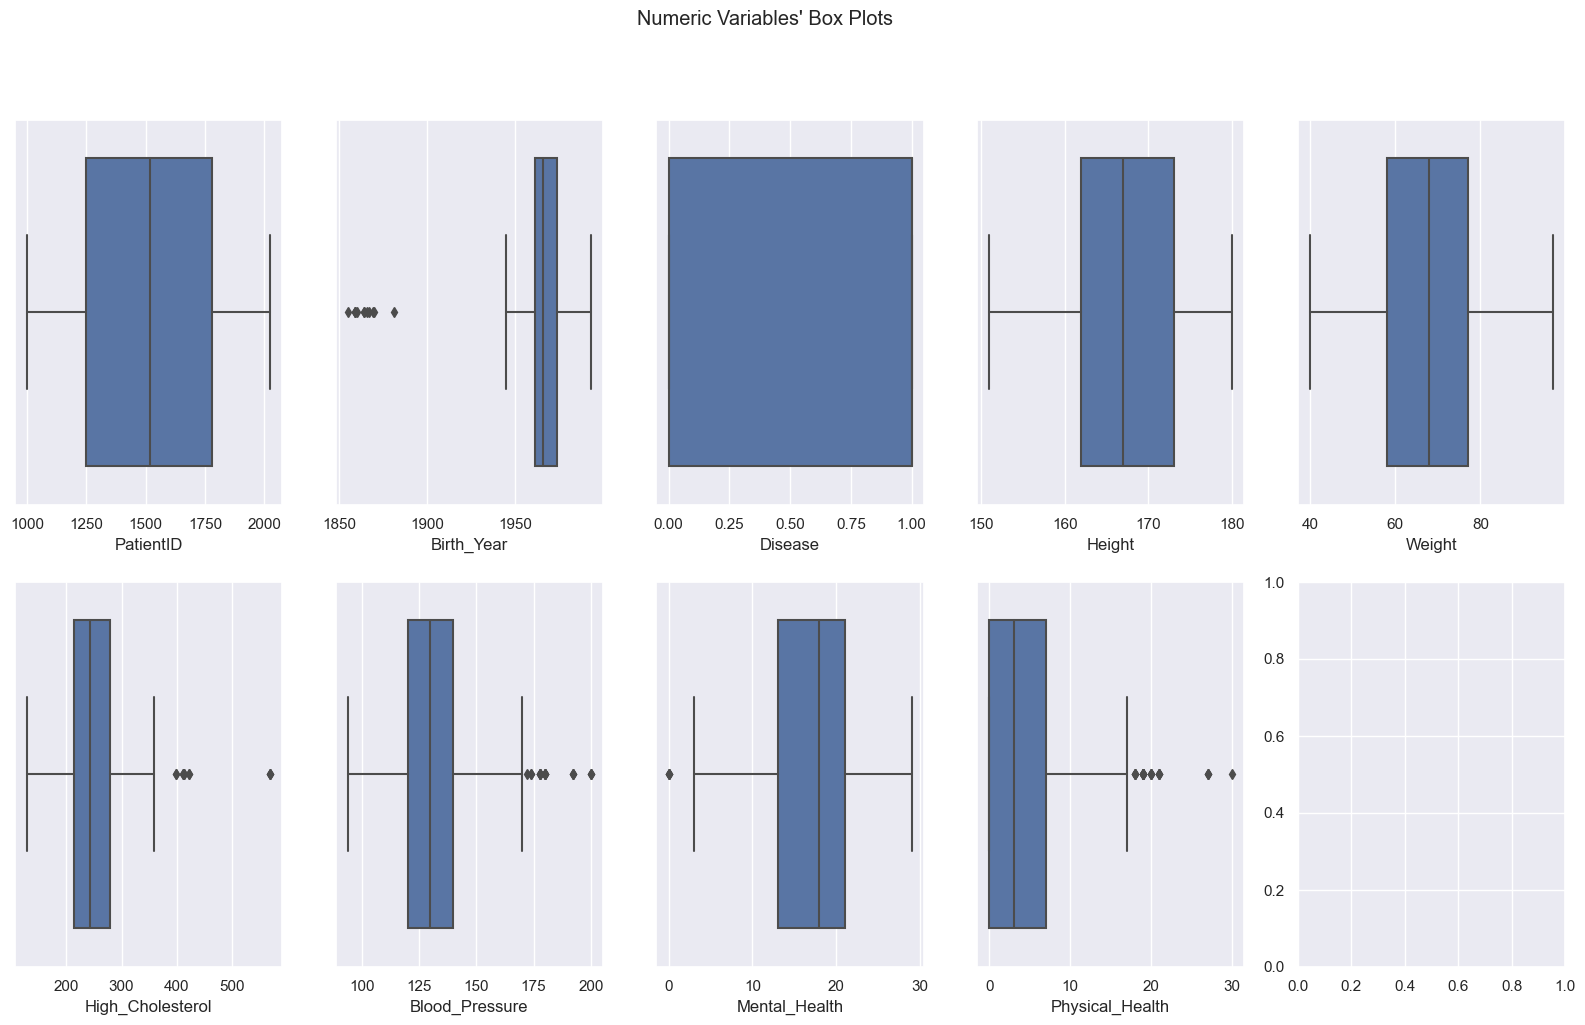

In [16]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join('figures', 'numeric_variables_boxplots.png'), dpi=200)
plt.show()

Let's take a look on __Categorical Variables' Uni-variate Distribution__ in the dataset.

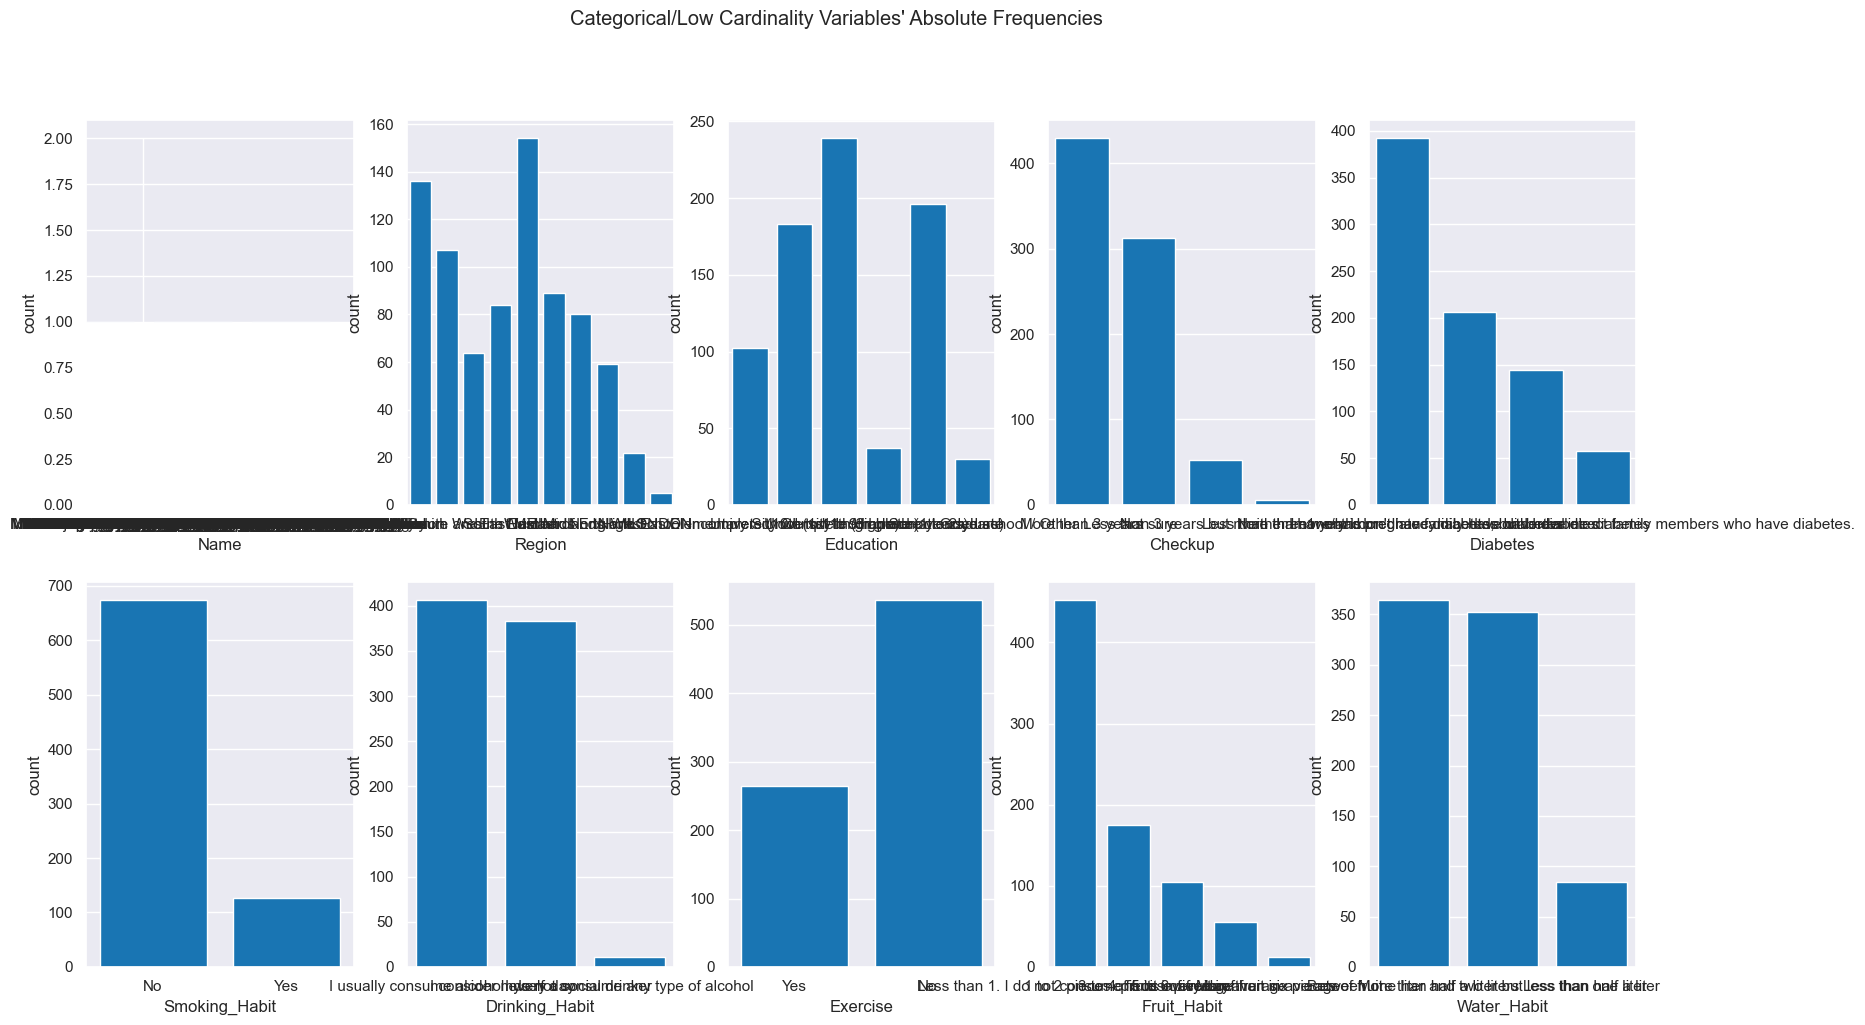

In [17]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join('figures', 'categorical_variables_frequecies.png'), dpi=200)
plt.show()

__`Histograms`__
Histograms show the distribution of a single variable in "bins" or groups of data based on the frequency of the occurrence of the value.

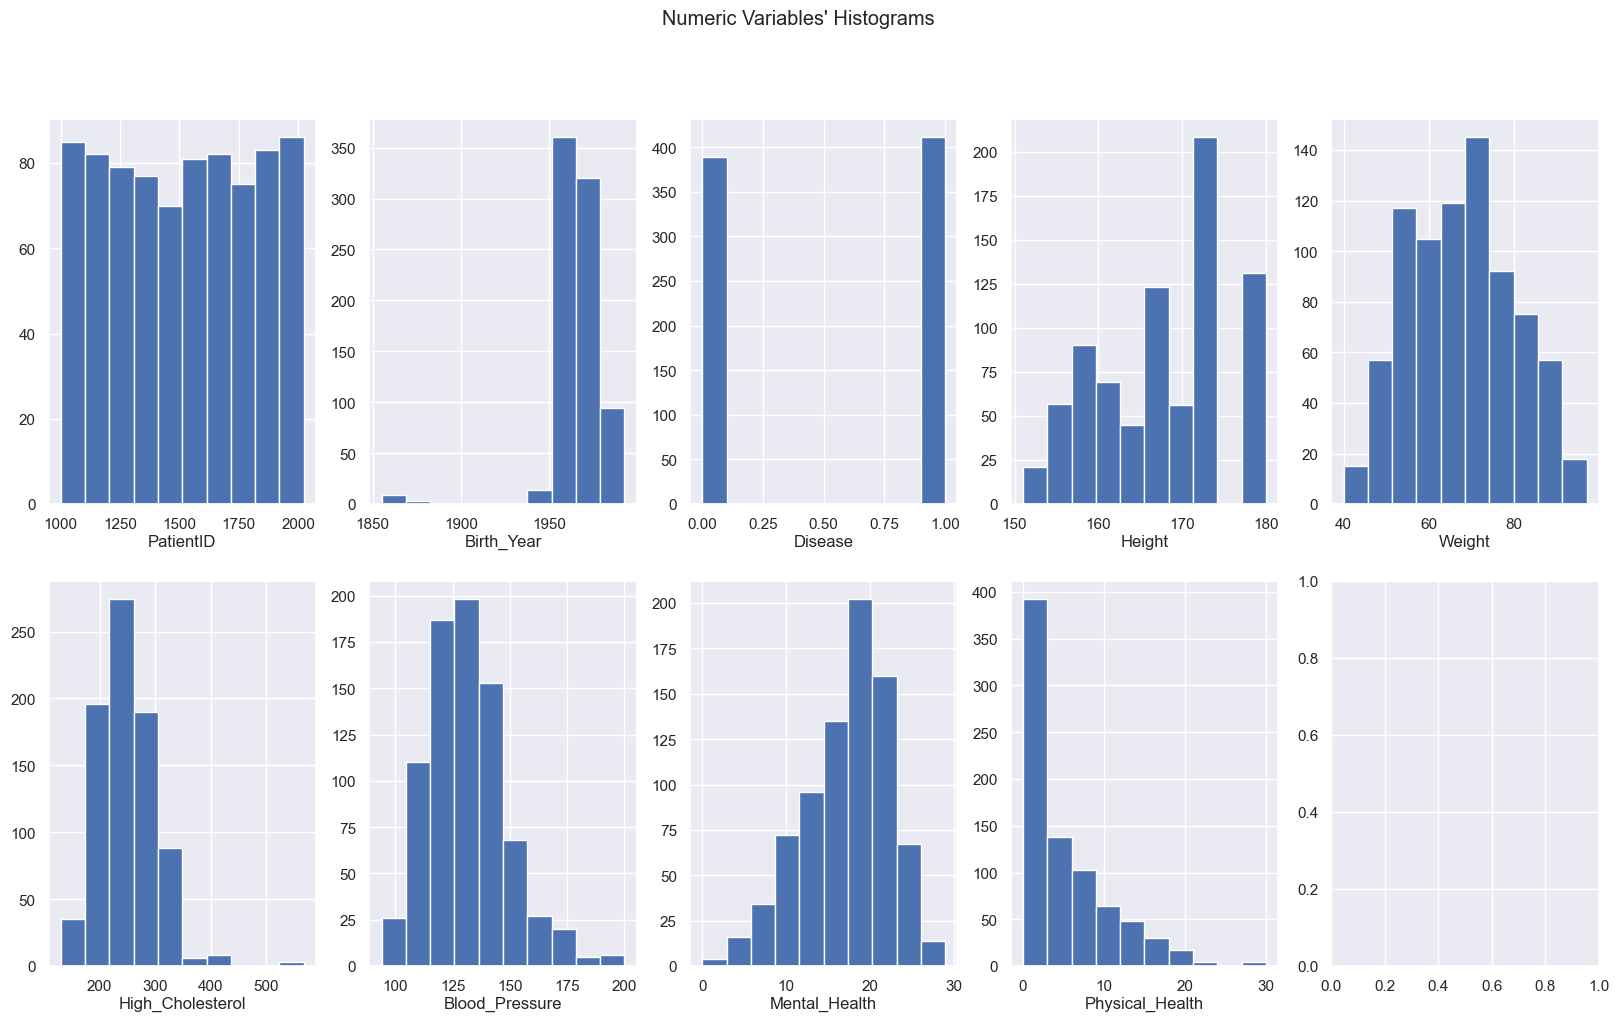

In [18]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.savefig(os.path.join('figures', 'numeric_variables_histograms.png'), dpi=200)
plt.show()

### Insights:
- uni-variate distributions (Gaussian distribution)
- potential uni-variate outliers

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 3. Data Pre-processing
</div>

Machine learning relies on data preprocessing to assess data quality and retrieves critical information that can influence the learning model’s performance.

__`3.1`__ __Data Partitioning__

Partitioning divides the dataset randomly into either two or three parts: training, testing and (optionally) validation, and is used to test the performance of a single model.

- Splitting data set into train and test sets before doing any processing to the data to avoid Data Leakage in future..

__`train_test_split`__ function below to perform the split and returns four sequences of our dataset in this order:
`x_train`: The training part of the first sequence (x)
`x_test`: The test part of the first sequence (x)
`y_train`: The training part of the second sequence (y)
`y_test`: The test part of the second sequence (y)

In [19]:
# Define Independent and target/dependent variables.
X = df.drop(columns=['Disease'], axis= 1)
y = df['Disease']

In [20]:
# Remove target/dependent variable from metric features
metric_features.remove('Disease')

In [21]:
# Split dataset into train (70%) and validation (30%).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=15, stratify= y)

__`3.2`__ __Data Cleansing__

`Cleansing` - Process of identifying and resolving corrupt, inaccurate, or irrelevant data.

__`3.2.1`__ __Data Imputation__

Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset.
`Mode Imputation` technique to replace the missing value with the variable with the highest frequency.

In [22]:
# Replacing Missing Data In train data Education column With The Most Frequent Values (mode) as it's categorical & Nans very small of data
X_train['Education'].fillna(value=X_train['Education'].mode()[0], inplace=True)

In [23]:
# Replacing Missing Data In validation data Education column With The Most Frequent Values (mode) as it's categorical & Nans very small of data
X_val['Education'].fillna(value=X_val['Education'].mode()[0], inplace=True)

`3.2.2` Outliers Removal

As explained at point `2.1.5` __Detect Outliers__ as both functions `detect_outliers_empirical` & `detect_outliers_iqr` returns same outliers in `Birth_Year` use any will get same results.

In [24]:
summary_train, outs_train = detect_outliers_empirical(X_train)
outs_train_df = X_train[~X_train['Birth_Year'].isin(pd.Series(outs_train['Birth_Year']))]
print('Percentage of train data kept after removing outliers:', np.round(outs_train_df.shape[0] / X_train.shape[0], 4))

summary_val, outs_val = detect_outliers_empirical(X_val)
outs_val_df = X_val[~X_val['Birth_Year'].isin(pd.Series(outs_val['Birth_Year']))]
print('Percentage of validation data kept after removing outliers:', np.round(outs_val_df.shape[0] / X_val.shape[0], 4))

# Overwrite the dataframe with outlier rows removed.
X_train = outs_train_df.copy()
X_val = outs_val_df.copy()

Percentage of train data kept after removing outliers: 0.9839
Percentage of validation data kept after removing outliers: 0.9875


In [25]:
X_val

,PatientID,Name,Birth_Year,Region,Education,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
223,1787,Mr. Willie Kanish,1971,North West,High School Graduate,167,58,302,140,11,20,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,Yes,5 to 6 pieces of fruit in average,Between one liter and two liters
17,1314,Mr. William Westfall,1982,South East,University Complete (3 or more years),162,70,203,140,24,6,Not sure,"I don't have diabetes, but I have direct famil...",No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Less than half a liter
371,1973,Mr. Frank Simmons,1971,East Midlands,High School Graduate,172,62,249,125,21,11,More than 3 years,I have/had pregnancy diabetes or borderline di...,Yes,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
608,1198,Mrs. Ray Goldberg,1962,North West,University Incomplete (1 to 2 years),157,69,322,102,20,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,1 to 2 pieces of fruit in average,Between one liter and two liters
246,1049,Mr. Michael Taylor,1962,East Midlands,High School Graduate,174,88,234,117,20,6,Not sure,Neither I nor my immediate family have diabetes.,Yes,I usually consume alcohol every day,Yes,3 to 4 pieces of fruit in average,More than half a liter but less than one liter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1456,Mr. Charles Rodriguez,1975,East of England,High School Graduate,180,88,247,108,18,0,More than 3 years,I have/had pregnancy diabetes or borderline di...,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
532,2015,Mr. James Luna,1964,West Midlands,Elementary School (1st to 9th grade),174,71,220,128,13,10,Not sure,Neither I nor my immediate family have diabetes.,No,I consider myself a social drinker,Yes,5 to 6 pieces of fruit in average,More than half a liter but less than one liter
552,1010,Mrs. Lisa King,1951,London,High School Incomplete (10th to 11th grade),172,65,153,112,12,7,More than 3 years,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters
333,1289,Mr. Coy Appel,1982,London,University Complete (3 or more years),171,87,227,152,25,0,Not sure,Neither I nor my immediate family have diabetes.,No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters


In [26]:
y_train

649    0
635    0
535    0
120    0
74     1
      ..
410    0
505    1
312    1
668    0
35     0
Name: Disease, Length: 560, dtype: int64

In [27]:
y_train = y_train[X_train.index]
y_val = y_val[X_val.index]
y_train

649    0
635    0
535    0
120    0
74     1
      ..
110    0
410    0
505    1
668    0
35     0
Name: Disease, Length: 551, dtype: int64

In [28]:
# Converting to "int" over "bool".
y_train = y_train.astype(int)
y_val = y_val.astype(int)

__`3.2.3`__ Avoid Typos

In [29]:
# Print frequency of categories
for col in X_val.select_dtypes(include=object).columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (X_train[col].value_counts())


Frequency of Categories for variable Name
Mr. Charles Tobin    1
Mr. John Hess        1
Mr. Bruce Austin     1
Mrs. Peggy Perez     1
Mr. Harold White     1
                    ..
Mr. Jake Cross       1
Mr. Richard Rohe     1
Mrs. Hazel Eison     1
Mr. Harvey Mulac     1
Mrs. Opal Miller     1
Name: Name, Length: 551, dtype: int64

Frequency of Categories for variable Region
London                      110
East Midlands               110
South West                   71
South East                   58
East of England              55
West Midlands                49
Yorkshire and the Humber     45
North West                   35
North East                   15
LONDON                        3
Name: Region, dtype: int64

Frequency of Categories for variable Education
University Complete (3 or more years)          171
High School Graduate                           132
Elementary School (1st to 9th grade)           128
High School Incomplete (10th to 11th grade)     73
I never attended schoo

In [30]:
# Modify Region and fixing typos
X_train['Region'] = X_train['Region'].replace({'LONDON':'London'})
X_val['Region'] = X_val['Region'].replace({'LONDON':'London'})

`3.3` Feature Engineering

`Feature engineering` is the process that takes raw data and transforms it into features that can be used to create a predictive model


`3.3.1` DataType Transformation

In [31]:
# Converting 'Yes' and 'No' to "boolean".
X_train['Exercise'] = X_train['Exercise'].map({'Yes':True ,'No':False}).astype("boolean")
X_val['Exercise'] = X_val['Exercise'].map({'Yes':True ,'No':False}).astype("boolean")
X_train['Smoking_Habit'] = X_train['Smoking_Habit'].map({'Yes':True ,'No':False}).astype("boolean")
X_val['Smoking_Habit'] = X_val['Smoking_Habit'].map({'Yes':True ,'No':False}).astype("boolean")

`3.3.2` Feature Extraction

In [32]:
# inserting new column 'Age' to carry patient age.
X_train.insert(3, 'Age', pd.Timestamp('now').year - X_train['Birth_Year'])
X_val.insert(3, 'Age', pd.Timestamp('now').year - X_val['Birth_Year'])

`3.3.3` Eliminate Irrelevant variables

In [33]:
X_train = X_train.drop(columns = ['PatientID', 'Name', 'Birth_Year'])
X_val = X_val.drop(columns = ['PatientID', 'Name', 'Birth_Year'])

In [34]:
# Re-Define metric and non-metric features.
metric_features = X_train.select_dtypes(include=np.number).columns.tolist()
non_metric_features = X_train.columns.drop(metric_features).to_list()

__`3.3.4`__ Binning Numerical Features

Dividing continuous or other numerical features into distinct groups.

- Blood Pressure in rest value (Diastolic)
- Cholesterol value

In [35]:
## Define function for grouping Diastolic BP readings into grades by blood pressure var
def get_hypertension_grp(blood_pressure):

    if blood_pressure < 80:
        return 'Optimal'

    elif (blood_pressure >= 80) & (blood_pressure <= 84):
        return 'Normal'

    elif (blood_pressure >= 85) & (blood_pressure <= 89):
        return 'High_Normal'

    elif (blood_pressure >= 90) & (blood_pressure <= 99):
        return 'Grade1'

    elif (blood_pressure >= 100) & (blood_pressure <= 109):
        return 'Grade2'

    elif blood_pressure >= 110:
        return 'Grade3'

In [36]:
X_train['Blood_Pressure_grp'] = X_train['Blood_Pressure'].apply(get_hypertension_grp)
X_val['Blood_Pressure_grp'] = X_val['Blood_Pressure'].apply(get_hypertension_grp)

In [37]:
## Define function for grouping HDL cholesterol readings into grades by High Cholesterol var
def get_HDL_cholesterol_grp(cholesterol):

    if cholesterol < 150:
        return 'Normal'

    elif (cholesterol >= 150) & (cholesterol <= 199):
        return 'Borderline_High'

    elif (cholesterol >= 200) & (cholesterol <= 499):
        return 'High'

    elif cholesterol >= 500:
        return 'Very_High'

In [38]:
X_train['High_Cholesterol_grp'] = X_train['High_Cholesterol'].apply(get_HDL_cholesterol_grp)
X_val['High_Cholesterol_grp'] = X_val['High_Cholesterol'].apply(get_HDL_cholesterol_grp)

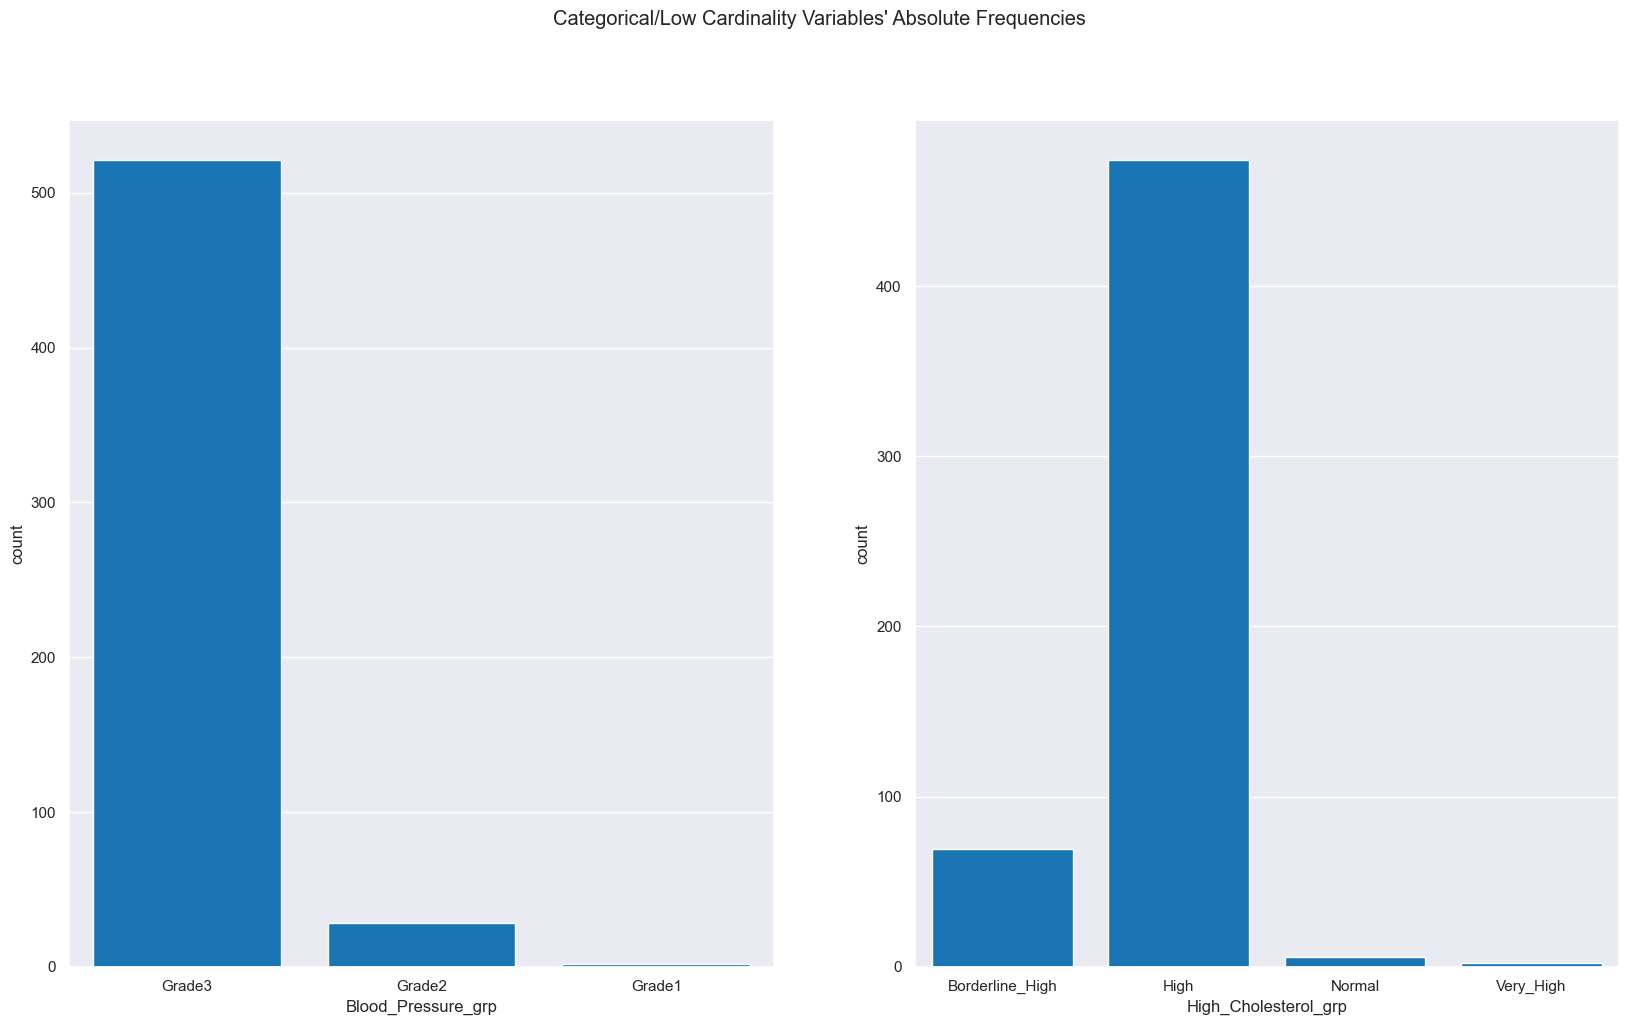

In [39]:
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(1, 2, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), ['Blood_Pressure_grp', 'High_Cholesterol_grp']): # Notice the zip() function and flatten() method
    sns.countplot(x=X_train[feat].astype(object), ax=ax, color='#007acc')

title = "Categorical/Low Cardinality Variables' Absolute Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join('figures', 'BP_HC_Grade_frequecies.png'), dpi=200)
plt.show()

__`3.4`__ __Feature Scaling__

`Scaling` is a method used to normalize the range of independent variables or features of data.

__`3.4.1`__ __Data Normalization__

`Normalization` is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [40]:
X_train_norm = X_train[metric_features].copy()
X_val_norm = X_val[metric_features].copy()

X_val_norm

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
223,51,167,58,302,140,11,20
17,40,162,70,203,140,24,6
371,51,172,62,249,125,21,11
608,60,157,69,322,102,20,0
246,60,174,88,234,117,20,6
...,...,...,...,...,...,...,...
182,47,180,88,247,108,18,0
532,58,174,71,220,128,13,10
552,71,172,65,153,112,12,7
333,40,171,87,227,152,25,0


In [41]:
# Use MinMaxScaler to scale the data
minMax_scaler = MinMaxScaler()

# Fit scaler & transform training data
X_train_norm_scaled = minMax_scaler.fit_transform(X_train_norm[metric_features])

# Fit scaler & transform val data
X_val_norm_scaled = minMax_scaler.fit_transform(X_val_norm[metric_features])

In [42]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", minMax_scaler.data_min_, "\n", minMax_scaler.data_max_)

Parameters fitted:
 [ 29. 151.  44. 130.  94.   0.   0.] 
 [ 76. 180.  97. 413. 192.  29.  27.]


In [43]:
X_train_norm[metric_features] = X_train_norm_scaled
X_train_norm.head()

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
649,0.666667,0.379310,0.438596,0.091324,0.415094,0.413793,0.566667
635,0.812500,0.551724,0.298246,0.152968,0.471698,0.551724,0.533333
535,0.604167,0.689655,0.543860,0.210046,0.490566,0.241379,0.300000
120,0.583333,0.379310,0.526316,0.242009,0.566038,0.724138,0.000000
74,0.520833,0.517241,0.666667,0.369863,0.358491,0.689655,0.000000


In [44]:
X_val_norm[metric_features] = X_val_norm_scaled
X_val_norm.head()

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
223,0.468085,0.551724,0.264151,0.607774,0.469388,0.379310,0.740741
17,0.234043,0.379310,0.490566,0.257951,0.469388,0.827586,0.222222
371,0.468085,0.724138,0.339623,0.420495,0.316327,0.724138,0.407407
608,0.659574,0.206897,0.471698,0.678445,0.081633,0.689655,0.000000
246,0.659574,0.793103,0.830189,0.367491,0.234694,0.689655,0.222222


In [45]:
# Checking max and min of X_train_norm variables
X_train_norm[metric_features].describe().round(2)

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
count,551.00,551.00,551.00,551.00,551.00,551.00,551.00
mean,0.53,0.58,0.49,0.27,0.35,0.59,0.15
std,0.19,0.27,0.21,0.12,0.16,0.18,0.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,0.38,0.33,0.19,0.25,0.45,0.00
50%,0.56,0.55,0.49,0.26,0.34,0.62,0.10
75%,0.67,0.76,0.63,0.34,0.43,0.72,0.23
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


_`3.4.2`_ __Data Standardization__

`Standardization` is the process of placing dissimilar features on the same scale. Standardized data in other words can be defined as rescaling the attributes in such a way that their mean is 0 and standard deviation becomes 1.

In [46]:
X_train_stand = X_train[metric_features].copy()
X_val_stand = X_val[metric_features].copy()

X_train

,Age,Region,Education,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Blood_Pressure_grp,High_Cholesterol_grp
649,61,South East,Elementary School (1st to 9th grade),162,65,170,138,12,17,More than 3 years,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,Borderline_High
635,68,East of England,University Complete (3 or more years),167,57,197,144,16,16,Not sure,Neither I nor my immediate family have diabetes.,True,I usually consume alcohol every day,False,3 to 4 pieces of fruit in average,Less than half a liter,Grade3,Borderline_High
535,58,London,Elementary School (1st to 9th grade),171,71,222,146,7,9,Not sure,Neither I nor my immediate family have diabetes.,False,I usually consume alcohol every day,False,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,High
120,57,London,High School Graduate,162,70,236,154,21,0,More than 3 years,I do have diabetes,False,I consider myself a social drinker,False,1 to 2 pieces of fruit in average,Between one liter and two liters,Grade3,High
74,54,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),166,78,292,132,20,0,More than 3 years,I do have diabetes,True,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,54,London,University Complete (3 or more years),165,56,290,122,10,15,More than 3 years,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,3 to 4 pieces of fruit in average,Less than half a liter,Grade3,High
410,58,Yorkshire and the Humber,Elementary School (1st to 9th grade),173,89,274,150,9,3,Not sure,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Grade3,High
505,45,South East,University Complete (3 or more years),174,89,312,128,22,0,More than 3 years,I do have diabetes,False,I consider myself a social drinker,False,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Grade3,High
668,52,South East,High School Graduate,162,59,208,128,19,4,Less than three months,Neither I nor my immediate family have diabetes.,True,I usually consume alcohol every day,True,Less than 1. I do not consume fruits every day.,Less than half a liter,Grade3,High


In [47]:
# Use StandardScaler to scale the data
stand_scaler = StandardScaler()

# Fit scaler & transform training data
X_train_stand_scaled = stand_scaler.fit_transform(X_train_stand[metric_features])

# Fit scaler & transform val data
X_val_stand_scaled = stand_scaler.fit_transform(X_val_stand[metric_features])

In [48]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", stand_scaler.mean_, "\n", stand_scaler.var_)

Parameters fitted:
 [ 54.17721519 168.07594937  68.21940928 247.03797468 130.55274262
  17.56118143   4.60337553] 
 [  82.86310954   63.37819794  155.67337855 2095.11670138  299.00671189
   30.66819776   30.71188734]


In [49]:
X_train_stand[metric_features] = X_train_stand_scaled
X_train_stand.head()

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
649,0.726339,-0.728653,-0.236051,-1.525537,0.389316,-0.977369,2.366226
635,1.509534,-0.098769,-0.908217,-1.004893,0.743104,-0.228110,2.177326
535,0.390684,0.405137,0.268073,-0.522814,0.861033,-1.913944,0.855023
120,0.278799,-0.728653,0.184053,-0.252851,1.332750,0.708465,-0.845081
74,-0.056856,-0.224746,0.856219,0.827005,0.035529,0.521150,-0.845081


In [50]:
X_val_stand[metric_features] = X_val_stand_scaled
X_val_stand.head()

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
223,-0.349033,-0.135152,-0.819065,1.200767,0.546343,-1.184781,2.778256
17,-1.557436,-0.763210,0.142711,-0.962107,0.546343,1.162685,0.252015
371,-0.349033,0.492907,-0.498473,0.042865,-0.321120,0.620962,1.154244
608,0.639661,-1.391269,0.062563,1.637711,-1.651229,0.440388,-0.830660
246,0.639661,0.744130,1.585375,-0.284843,-0.783767,0.440388,0.252015


In [51]:
# Checking mean and variance of standardized variables
X_train_stand[metric_features].describe().round(2)

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
count,551.00,551.00,551.00,551.00,551.00,551.00,551.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.85,-2.11,-2.34,-2.30,-2.21,-3.23,-0.85
25%,-0.73,-0.73,-0.74,-0.71,-0.67,-0.79,-0.85
50%,0.17,-0.10,0.02,-0.10,-0.08,0.15,-0.28
75%,0.73,0.66,0.69,0.60,0.51,0.71,0.48
max,2.52,1.54,2.45,6.15,4.05,2.21,4.82


__`3.4.3`__ __Comparing unscaled, normalized and standardized data__

It is always great to visualize your data to understand the distribution present. We can see the comparison between our unscaled and scaled data using boxplots.


__Original Data__

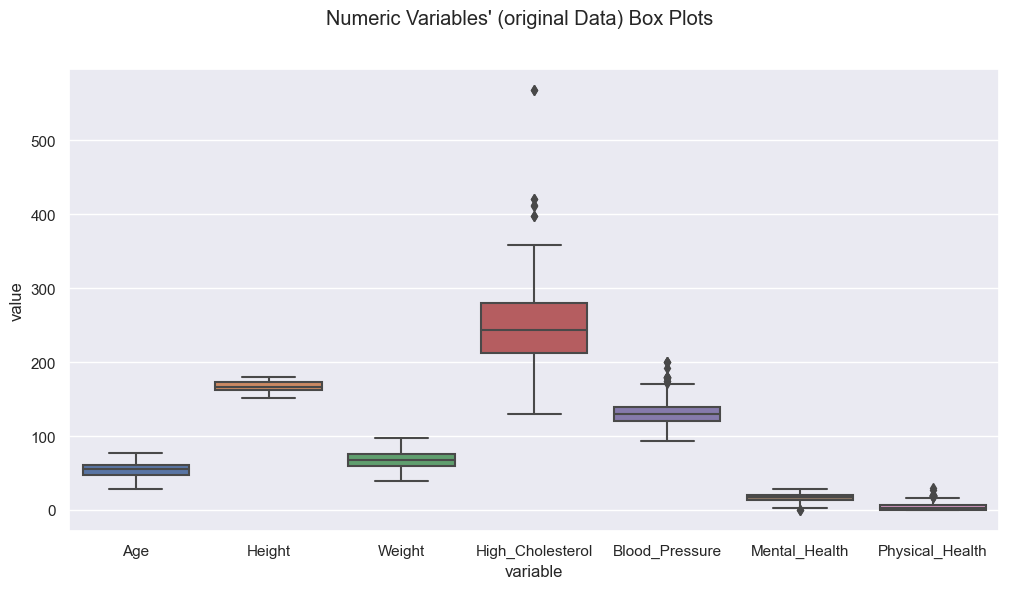

In [52]:
# All Numeric Variables' Box Plots
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(figsize=(12, 6))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(X_train[metric_features]))

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (original Data) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join('figures', 'numeric_variables_original_data_boxplots.png'), dpi=200)
plt.show()

__Normalized Data__

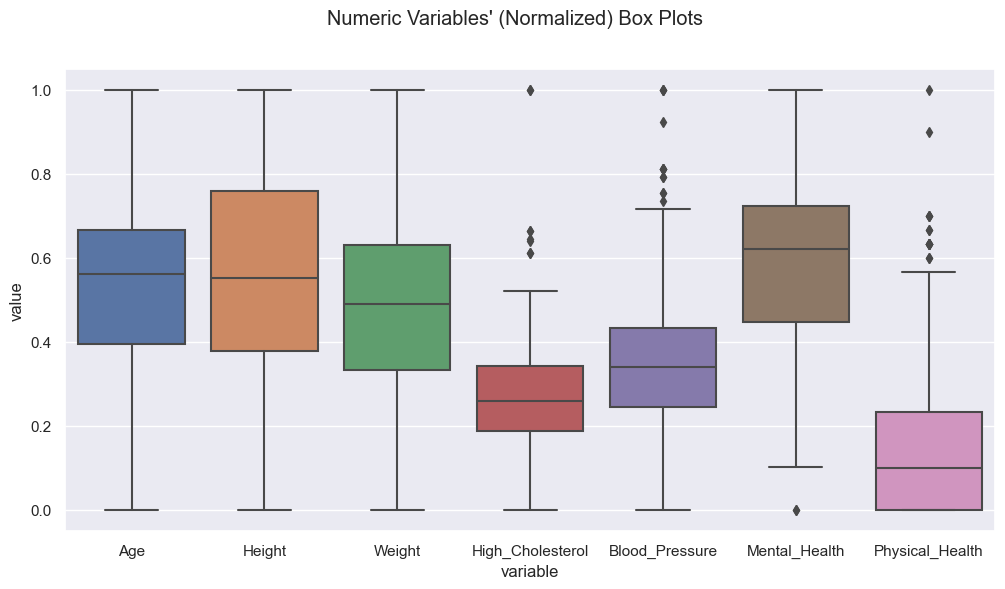

In [53]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
plt.subplots(figsize=(12, 6))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_norm[metric_features]))

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (Normalized) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join('figures', 'numeric_variables_normalized_data_boxplots.png'), dpi=200)
plt.show()

__Standardized Data__

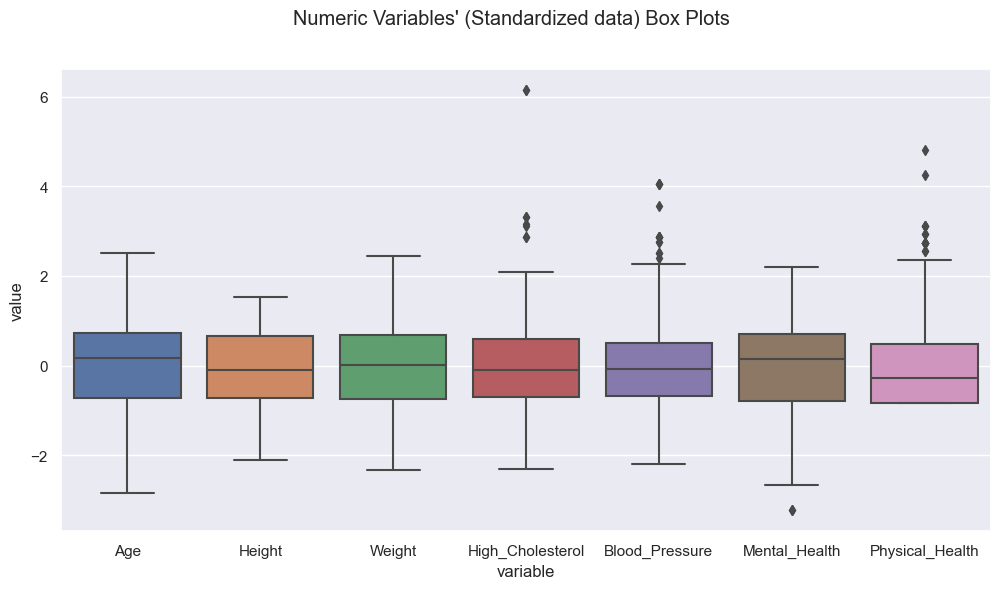

In [54]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
plt.subplots(figsize=(12, 6))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(X_train_stand[metric_features]))

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (Standardized data) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join('figures', 'numeric_variables_standarized_boxplots.png'), dpi=200)
plt.show()

We can notice how scaling the features brings everything into perspective. The features are now more comparable and will have a similar effect on the learning models.

__`3.5`__ Categorical Encoding

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the models to give and improve the predictions.

__`ReDefine Metric/Non-Metric Features`__

In [55]:
# Define ordinal / nominal categorical features
non_metric_ordinal_features = ['Blood_Pressure_grp', 'High_Cholesterol_grp']
non_metric_nominal_features = [e for e in non_metric_features if e not in non_metric_ordinal_features]
#non_metric_features = non_metric_ordinal_features + non_metric_nominal_features

non_metric_features

['Region',
 'Education',
 'Checkup',
 'Diabetes',
 'Smoking_Habit',
 'Drinking_Habit',
 'Exercise',
 'Fruit_Habit',
 'Water_Habit']

In [56]:
# Copy train & val df into encoding df
train_enc_df = X_train[non_metric_ordinal_features+non_metric_nominal_features].copy()
val_enc_df = X_val[non_metric_ordinal_features+non_metric_nominal_features].copy()

__`Replace Checkup = Not Sure with mode value`__

In [57]:
# First let's remove Checkup=Not Sure
train_enc_df.loc[train_enc_df['Checkup'] == 'Not sure', 'Checkup'] = train_enc_df['Checkup'].mode()[0]
val_enc_df.loc[val_enc_df['Checkup'] == 'Not sure', 'Checkup'] = val_enc_df['Checkup'].mode()[0]

__`3.5.1`__ Ordinal Encoding

__`Blood_Pressure_grp`__

In [58]:
train_oenc_df = train_enc_df[['Blood_Pressure_grp', 'High_Cholesterol_grp']].copy()
val_oenc_df = val_enc_df[['Blood_Pressure_grp', 'High_Cholesterol_grp']].copy()

train_oenc_df

,Blood_Pressure_grp,High_Cholesterol_grp
649,Grade3,Borderline_High
635,Grade3,Borderline_High
535,Grade3,High
120,Grade3,High
74,Grade3,High
...,...,...
110,Grade3,High
410,Grade3,High
505,Grade3,High
668,Grade3,High


In [59]:
# Blood Pressure unique grades
train_oenc_df['Blood_Pressure_grp'].unique()

array(['Grade3', 'Grade2', 'Grade1'], dtype=object)

In [60]:
# define data
bp_grades = ['Grade1', 'Grade2', 'Grade3']
# define ordinal encoding
oenc = OrdinalEncoder(categories=[bp_grades])
# transform data
train_oenc_df['Blood_Pressure_grp'] = oenc.fit_transform(train_oenc_df[['Blood_Pressure_grp']])
val_oenc_df['Blood_Pressure_grp'] = oenc.fit_transform(val_oenc_df[['Blood_Pressure_grp']])

train_oenc_df.head(10)

,Blood_Pressure_grp,High_Cholesterol_grp
649,2.0,Borderline_High
635,2.0,Borderline_High
535,2.0,High
120,2.0,High
74,2.0,High
500,2.0,Borderline_High
308,2.0,High
751,2.0,High
275,2.0,High
583,2.0,High


__`High_Cholesterol_grp`__

In [61]:
# High Cholesterol unique grades
train_oenc_df['High_Cholesterol_grp'].unique()

array(['Borderline_High', 'High', 'Normal', 'Very_High'], dtype=object)

In [62]:
# define data
hc_grades = ['Normal', 'Borderline_High', 'High', 'Very_High']
# define ordinal encoding
oenc = OrdinalEncoder(categories=[hc_grades])
# transform data
train_oenc_df['High_Cholesterol_grp'] = oenc.fit_transform(train_oenc_df[['High_Cholesterol_grp']])
val_oenc_df['High_Cholesterol_grp'] = oenc.fit_transform(val_oenc_df[['High_Cholesterol_grp']])

train_oenc_df.head(10)

,Blood_Pressure_grp,High_Cholesterol_grp
649,2.0,1.0
635,2.0,1.0
535,2.0,2.0
120,2.0,2.0
74,2.0,2.0
500,2.0,1.0
308,2.0,2.0
751,2.0,2.0
275,2.0,2.0
583,2.0,2.0


In [63]:
# Reassigning df to contain ohc variables
train_enc_df = pd.concat([train_enc_df.drop(columns=non_metric_ordinal_features), train_oenc_df], axis=1).set_index(X_train.index)
val_enc_df = pd.concat([val_enc_df.drop(columns=non_metric_ordinal_features), val_oenc_df], axis=1).set_index(X_val.index)
train_enc_df.head()

,Region,Education,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Blood_Pressure_grp,High_Cholesterol_grp
649,South East,Elementary School (1st to 9th grade),More than 3 years,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,2.0,1.0
635,East of England,University Complete (3 or more years),More than 3 years,Neither I nor my immediate family have diabetes.,True,I usually consume alcohol every day,False,3 to 4 pieces of fruit in average,Less than half a liter,2.0,1.0
535,London,Elementary School (1st to 9th grade),More than 3 years,Neither I nor my immediate family have diabetes.,False,I usually consume alcohol every day,False,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,2.0,2.0
120,London,High School Graduate,More than 3 years,I do have diabetes,False,I consider myself a social drinker,False,1 to 2 pieces of fruit in average,Between one liter and two liters,2.0,2.0
74,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),More than 3 years,I do have diabetes,True,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,2.0,2.0


__`3.5.2`__ One-Hot Encoding

It creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

In [64]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame
ohc = OneHotEncoder(sparse=False)
train_ohenc_feat = ohc.fit_transform(train_enc_df[non_metric_nominal_features])
train_ohenc_feat_names = ohc.get_feature_names_out()
train_ohenc_df = pd.DataFrame(train_ohenc_feat, index=train_enc_df.index, columns=train_ohenc_feat_names).set_index(X_train.index)
train_ohenc_df

,Region_East Midlands,Region_East of England,Region_London,Region_North East,Region_North West,Region_South East,Region_South West,Region_West Midlands,Region_Yorkshire and the Humber,Education_Elementary School (1st to 9th grade),...,Exercise_False,Exercise_True,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Water_Habit_Between one liter and two liters,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter
649,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
635,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
535,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
120,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [65]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame
ohc = OneHotEncoder(sparse=False)
val_ohenc_feat = ohc.fit_transform(val_enc_df[non_metric_nominal_features])
val_ohenc_feat_names = ohc.get_feature_names_out()
val_ohenc_df = pd.DataFrame(val_ohenc_feat, index=val_enc_df.index, columns=val_ohenc_feat_names).set_index(X_val.index)
val_ohenc_df

,Region_East Midlands,Region_East of England,Region_London,Region_North East,Region_North West,Region_South East,Region_South West,Region_West Midlands,Region_Yorkshire and the Humber,Education_Elementary School (1st to 9th grade),...,Exercise_False,Exercise_True,Fruit_Habit_1 to 2 pieces of fruit in average,Fruit_Habit_3 to 4 pieces of fruit in average,Fruit_Habit_5 to 6 pieces of fruit in average,Fruit_Habit_Less than 1. I do not consume fruits every day.,Fruit_Habit_More than six pieces of fruit,Water_Habit_Between one liter and two liters,Water_Habit_Less than half a liter,Water_Habit_More than half a liter but less than one liter
223,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
371,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
608,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
552,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


__Challenges of One-Hot Encoding__: `Dummy Variable Trap`

One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables.

Dummy Variable Trap is a scenario in which variables are highly correlated to each other.

The Dummy Variable Trap leads to the problem known as multi-collinearity. Multi-collinearity occurs where there is a dependency between the independent features. Multi-collinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

In [66]:
# Reassigning df to contain ohc variables
# train_enc_df = pd.concat([train_enc_df.drop(columns=non_metric_nominal_features), train_ohenc_df], axis=1).set_index(X_train.index)
# val_enc_df = pd.concat([val_enc_df.drop(columns=non_metric_nominal_features), val_ohenc_df], axis=1).set_index(X_val.index)
train_enc_df.head()

,Region,Education,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Blood_Pressure_grp,High_Cholesterol_grp
649,South East,Elementary School (1st to 9th grade),More than 3 years,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,2.0,1.0
635,East of England,University Complete (3 or more years),More than 3 years,Neither I nor my immediate family have diabetes.,True,I usually consume alcohol every day,False,3 to 4 pieces of fruit in average,Less than half a liter,2.0,1.0
535,London,Elementary School (1st to 9th grade),More than 3 years,Neither I nor my immediate family have diabetes.,False,I usually consume alcohol every day,False,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,2.0,2.0
120,London,High School Graduate,More than 3 years,I do have diabetes,False,I consider myself a social drinker,False,1 to 2 pieces of fruit in average,Between one liter and two liters,2.0,2.0
74,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),More than 3 years,I do have diabetes,True,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,2.0,2.0


__`3.5.3`__ Label Encoding

In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [67]:
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
y_val_enc = le.transform(y_val)

non_metric_features

['Region',
 'Education',
 'Checkup',
 'Diabetes',
 'Smoking_Habit',
 'Drinking_Habit',
 'Exercise',
 'Fruit_Habit',
 'Water_Habit']

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 4. Feature Selection
</div>

In [68]:
X_train

,Age,Region,Education,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Blood_Pressure_grp,High_Cholesterol_grp
649,61,South East,Elementary School (1st to 9th grade),162,65,170,138,12,17,More than 3 years,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,Borderline_High
635,68,East of England,University Complete (3 or more years),167,57,197,144,16,16,Not sure,Neither I nor my immediate family have diabetes.,True,I usually consume alcohol every day,False,3 to 4 pieces of fruit in average,Less than half a liter,Grade3,Borderline_High
535,58,London,Elementary School (1st to 9th grade),171,71,222,146,7,9,Not sure,Neither I nor my immediate family have diabetes.,False,I usually consume alcohol every day,False,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,High
120,57,London,High School Graduate,162,70,236,154,21,0,More than 3 years,I do have diabetes,False,I consider myself a social drinker,False,1 to 2 pieces of fruit in average,Between one liter and two liters,Grade3,High
74,54,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),166,78,292,132,20,0,More than 3 years,I do have diabetes,True,I consider myself a social drinker,True,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,Grade3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,54,London,University Complete (3 or more years),165,56,290,122,10,15,More than 3 years,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,3 to 4 pieces of fruit in average,Less than half a liter,Grade3,High
410,58,Yorkshire and the Humber,Elementary School (1st to 9th grade),173,89,274,150,9,3,Not sure,Neither I nor my immediate family have diabetes.,False,I consider myself a social drinker,True,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Grade3,High
505,45,South East,University Complete (3 or more years),174,89,312,128,22,0,More than 3 years,I do have diabetes,False,I consider myself a social drinker,False,Less than 1. I do not consume fruits every day.,Between one liter and two liters,Grade3,High
668,52,South East,High School Graduate,162,59,208,128,19,4,Less than three months,Neither I nor my immediate family have diabetes.,True,I usually consume alcohol every day,True,Less than 1. I do not consume fruits every day.,Less than half a liter,Grade3,High


__`4.1`__ Feature Selection for Numeric Values

In [69]:
X_train_num_scaled = X_train_stand
X_val_num_scaled = X_val_stand
X_train_num_scaled

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
649,0.726339,-0.728653,-0.236051,-1.525537,0.389316,-0.977369,2.366226
635,1.509534,-0.098769,-0.908217,-1.004893,0.743104,-0.228110,2.177326
535,0.390684,0.405137,0.268073,-0.522814,0.861033,-1.913944,0.855023
120,0.278799,-0.728653,0.184053,-0.252851,1.332750,0.708465,-0.845081
74,-0.056856,-0.224746,0.856219,0.827005,0.035529,0.521150,-0.845081
...,...,...,...,...,...,...,...
110,-0.056856,-0.350723,-0.992238,0.788439,-0.554117,-1.351999,1.988425
410,0.390684,0.657091,1.780447,0.479909,1.096891,-1.539314,-0.278380
505,-1.063821,0.783068,1.780447,1.212668,-0.200330,0.895780,-0.845081
668,-0.280626,-0.728653,-0.740176,-0.792778,-0.200330,0.333835,-0.089479


__`4.1.1`__ __Spearman Correlation__

In [70]:
train_num_scaled = X_train_stand.join(y_train)
val_num_scaled = X_val_stand.join(y_val)
train_num_scaled

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Disease
649,0.726339,-0.728653,-0.236051,-1.525537,0.389316,-0.977369,2.366226,0
635,1.509534,-0.098769,-0.908217,-1.004893,0.743104,-0.228110,2.177326,0
535,0.390684,0.405137,0.268073,-0.522814,0.861033,-1.913944,0.855023,0
120,0.278799,-0.728653,0.184053,-0.252851,1.332750,0.708465,-0.845081,0
74,-0.056856,-0.224746,0.856219,0.827005,0.035529,0.521150,-0.845081,1
...,...,...,...,...,...,...,...,...
110,-0.056856,-0.350723,-0.992238,0.788439,-0.554117,-1.351999,1.988425,0
410,0.390684,0.657091,1.780447,0.479909,1.096891,-1.539314,-0.278380,0
505,-1.063821,0.783068,1.780447,1.212668,-0.200330,0.895780,-0.845081,1
668,-0.280626,-0.728653,-0.740176,-0.792778,-0.200330,0.333835,-0.089479,0


In [71]:
cor_spearman = train_num_scaled.corr(method ='spearman')
cor_spearman

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Disease
Age,1.000000,-0.048365,-0.142203,0.183139,0.293391,-0.374445,0.250971,-0.214291
Height,-0.048365,1.000000,0.468585,-0.043930,-0.005112,-0.055917,0.033302,-0.156764
Weight,-0.142203,0.468585,1.000000,-0.033824,-0.066810,0.324459,-0.432129,0.187946
High_Cholesterol,0.183139,-0.043930,-0.033824,1.000000,0.154127,-0.016749,0.044082,-0.108453
Blood_Pressure,0.293391,-0.005112,-0.066810,0.154127,1.000000,-0.034763,0.145341,-0.141017
Mental_Health,-0.374445,-0.055917,0.324459,-0.016749,-0.034763,1.000000,-0.398831,0.441050
Physical_Health,0.250971,0.033302,-0.432129,0.044082,0.145341,-0.398831,1.000000,-0.403479
Disease,-0.214291,-0.156764,0.187946,-0.108453,-0.141017,0.441050,-0.403479,1.000000


In [72]:
def heatmap_corr(cor, corr_method):
    # Adjust mask and correlation
    mask = np.triu(np.ones_like(cor,dtype=bool))
    mask = mask[1:,:-1]
    p_corr = cor.iloc[1:,:-1].copy()
    # Setting up a diverging palette
    plt.subplots(figsize=(14,8))
    sns.heatmap(p_corr, vmin=-1,vmax=1, cmap = plt.cm.Reds, annot=True, linewidth=0.3, mask=mask, fmt='.1')
    plt.title(corr_method)

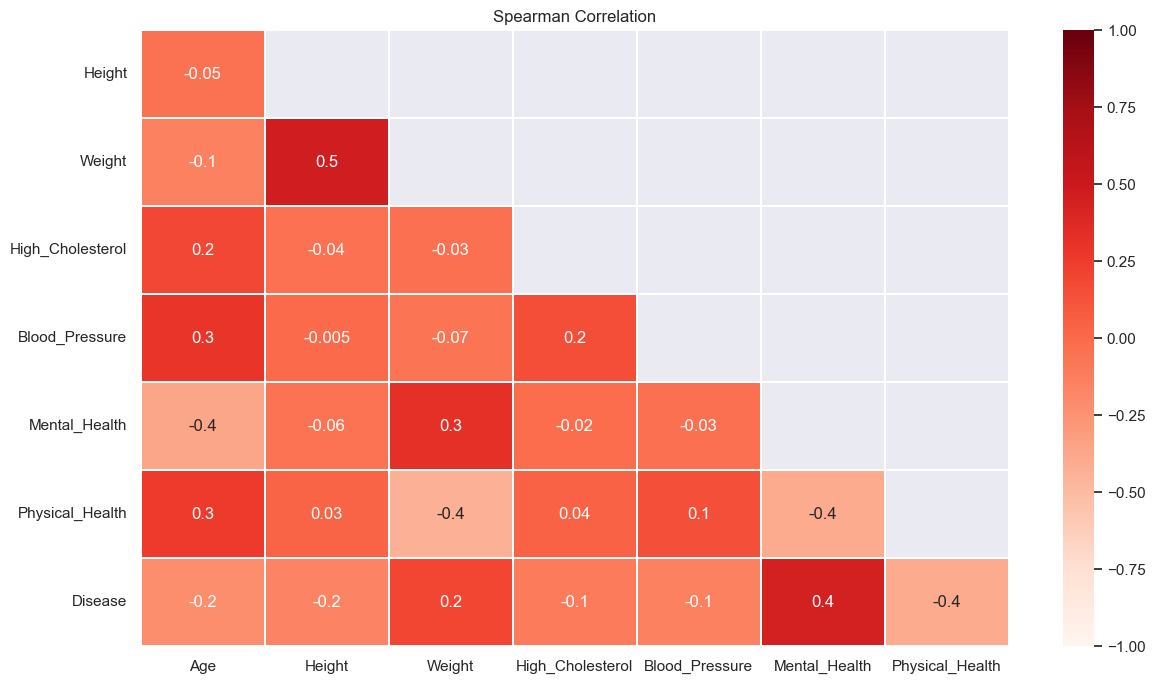

In [73]:
heatmap_corr(cor_spearman, "Spearman Correlation")

__`4.1.2`__ __Pearson__

In [74]:
cor_pearson = train_num_scaled.corr(method ='pearson')
cor_pearson

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Disease
Age,1.000000,-0.057365,-0.147879,0.206272,0.280506,-0.385492,0.190652,-0.200034
Height,-0.057365,1.000000,0.496986,-0.069070,-0.012668,-0.057862,0.036295,-0.180095
Weight,-0.147879,0.496986,1.000000,-0.040523,-0.099897,0.289627,-0.406648,0.174566
High_Cholesterol,0.206272,-0.069070,-0.040523,1.000000,0.140831,0.009312,0.054108,-0.074015
Blood_Pressure,0.280506,-0.012668,-0.099897,0.140831,1.000000,-0.047601,0.185296,-0.168494
Mental_Health,-0.385492,-0.057862,0.289627,0.009312,-0.047601,1.000000,-0.311959,0.431369
Physical_Health,0.190652,0.036295,-0.406648,0.054108,0.185296,-0.311959,1.000000,-0.411269
Disease,-0.200034,-0.180095,0.174566,-0.074015,-0.168494,0.431369,-0.411269,1.000000


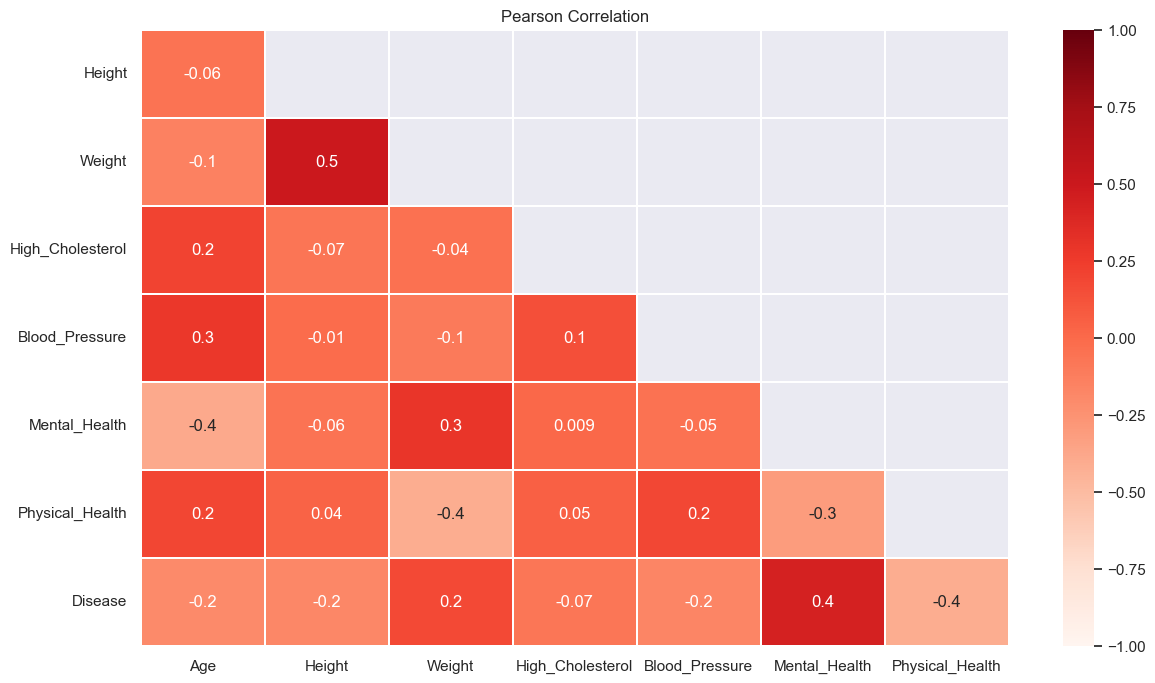

In [75]:
heatmap_corr(cor_pearson, "Pearson Correlation")

We can conclude that:
- There is no independent variable highly correlated with the target. We need to use other feature selection techniques to get more insights.

__`4.1.3`__ __RPE__

This time we are going to apply Recursive Feature Elimination (RFE / Backwards) that will allow to select the most important features to keep. The base estimator used will be a Logistic Regression.

As we don't know apriori the number of features to select we can create a loop to check the score of the estimator using a different number of features.

In [76]:
X_train_num_scaled

,Age,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
649,0.726339,-0.728653,-0.236051,-1.525537,0.389316,-0.977369,2.366226
635,1.509534,-0.098769,-0.908217,-1.004893,0.743104,-0.228110,2.177326
535,0.390684,0.405137,0.268073,-0.522814,0.861033,-1.913944,0.855023
120,0.278799,-0.728653,0.184053,-0.252851,1.332750,0.708465,-0.845081
74,-0.056856,-0.224746,0.856219,0.827005,0.035529,0.521150,-0.845081
...,...,...,...,...,...,...,...
110,-0.056856,-0.350723,-0.992238,0.788439,-0.554117,-1.351999,1.988425
410,0.390684,0.657091,1.780447,0.479909,1.096891,-1.539314,-0.278380
505,-1.063821,0.783068,1.780447,1.212668,-0.200330,0.895780,-0.845081
668,-0.280626,-0.728653,-0.740176,-0.792778,-0.200330,0.333835,-0.089479


In [77]:
#no of features
nof_list=list(range(1,8))
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in nof_list:
    model = LogisticRegression()
    rfe = RFE(estimator= model, n_features_to_select=3)
    X_train_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe, y_train)

    score = model.score(X_val_rfe, y_val)
    score_list.append(score)

    if score>high_score:
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 0.738397


Using LogisticRegression, create a Logistic Regression Classifier instance called `lr_model`

In [78]:
lr_model = LogisticRegression()

Using RFE, create a RFE instance called `rfe` and initialize by defining the following parameters:
- `estimator` = model
- `n_features_to_select` = 2

In [79]:
rfe = RFE(estimator = lr_model, n_features_to_select = 2)

Transform the data using RFE by applying the method `fit_transform()` to the instance `rfe`, where `X` should be assigned to your independent variables and `y` to the dependent variable and assign it to the object `X_rfe`

In [80]:
X_rfe = rfe.fit_transform(X = X_train_num_scaled , y = y_train)

Check the variables that were selected by RFE as the most "important" ones by calling the attribute `support_` to `rfe`.

In [81]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Age                 False
Height              False
Weight              False
High_Cholesterol    False
Blood_Pressure      False
Mental_Health        True
Physical_Health      True
dtype: bool

Check the variables ranking by RFE as the most "important" ones by calling the attribute `ranking_` to `rfe`.

In [82]:
selected_features = pd.Series(rfe.ranking_, index = X_train_num_scaled.columns)
selected_features

Age                 6
Height              2
Weight              5
High_Cholesterol    4
Blood_Pressure      3
Mental_Health       1
Physical_Health     1
dtype: int64

__`Final Insights`__

### Numerical Data

| Predictor         | Spearman | RFE     | What to do? (One possible way to "solve") |
|-------------------|----------|---------|----------------------|
| Age               | Discard  | Discard    | Discard                     |
| Height            | Discard  | Discard | Discard              |
| Weight            | Discard  | Discard    | Discard |
| Hight_Cholesterol | Discard  | Discard    | Discard |
| Blood_Pressure    | Discard  | Discard    | Discard |
| Mental_Health     | Keep ?   | Keep    | Include in the model                 |
| Physical_Health   | Keep ?   | Keep    | Include in the model                 |

__`4.2`__ __Feature Selection for Categorical values__

__`4.2.1`__ __Chi-Square__

The Chi-Square test of independence is used to determine if there is a significant relationship between two categorical (nominal) variables. It means the Chi-Square Test of Independence is a hypothesis testing test with 2 hypotheses present; the Null Hypothesis and the Alternative Hypothesis.

__`Null Hypothesis (H0)`__: There is no relationship between the variables
__`Alternative Hypothesis (H1)`__: There is a relationship between variables

In [118]:
def TestIndependence(X, y, alpha=0.05):
    df_observed = pd.crosstab(y,X)
    check, p, dof, expected = stats.chi2_contingency(df_observed.values)
    df_expected = pd.DataFrame(expected, columns=df_observed.columns, index = df_observed.index)
    if p < alpha:
        result = "Reject Null Hypothesis"
    else:
        result = "Fail to Reject Null Hypothesis (no relationship with output)"
    return result

In [123]:
chi2_check = {}
for var in non_metric_nominal_features:
    res = TestIndependence(train_enc_df[var], y_train_enc)
    chi2_check[var] = res

chi2_check = pd.DataFrame(data = [chi2_check]).T
chi2_check

,0
Region,Fail to Reject Null Hypothesis (no relationshi...
Education,Reject Null Hypothesis
Checkup,Reject Null Hypothesis
Diabetes,Reject Null Hypothesis
Smoking_Habit,Fail to Reject Null Hypothesis (no relationshi...
Drinking_Habit,Reject Null Hypothesis
Exercise,Reject Null Hypothesis
Fruit_Habit,Reject Null Hypothesis
Water_Habit,Fail to Reject Null Hypothesis (no relationshi...


__`4.2.2`__ __Post Hoc Testing__

The Chi-square test of independence is an omnibus test which means it tests the data as a whole. If we have multiple classes within a category, we would not be able to easily tell which class of the features are responsible for the relationship.

To conduct multiple 2×2 Chi-square test of independence, we need to regroup the features for each test to where it is one category class against the rest.

We can apply `OneHotEncoding` to each class and create a new cross-tab table against the other feature.

Comparing multiple classes against each other means that the error rate of a false positive compound with each test.
This means that our Chi-square test would have a quite high error rate.

__`Bonferroni-adjusted method`__ for correcting the p-value we use. We adjust our P-value by the number of pairwise comparisons we want to do. The formula is __p/N__, where __p= the p-value of the original test and N= the number of planned pairwise comparisons__.

In [124]:
chi2_check = {}
for var in non_metric_nominal_features:
    alpha = 0.05/train_enc_df[var].nunique()
    for var_class in train_enc_df[var].unique():
        class_name = var + "_" + str(var_class)
        res = TestIndependence(train_enc_df[var], y_train_enc)
        chi2_check[class_name] = res

chi2_check = pd.DataFrame(data = [chi2_check]).T
chi2_check

,0
Region_South East,Fail to Reject Null Hypothesis (no relationshi...
Region_East of England,Fail to Reject Null Hypothesis (no relationshi...
Region_London,Fail to Reject Null Hypothesis (no relationshi...
Region_Yorkshire and the Humber,Fail to Reject Null Hypothesis (no relationshi...
Region_East Midlands,Fail to Reject Null Hypothesis (no relationshi...
Region_South West,Fail to Reject Null Hypothesis (no relationshi...
Region_West Midlands,Fail to Reject Null Hypothesis (no relationshi...
Region_North East,Fail to Reject Null Hypothesis (no relationshi...
Region_North West,Fail to Reject Null Hypothesis (no relationshi...
Education_Elementary School (1st to 9th grade),Reject Null Hypothesis


__Final Insights__

### Categorical Data

| Predictor | Chi-Square |
| --- |------------|
| Region | Discard       |
| Education | Keep       |
| Checkup | Keep       |
| Diabetes | Keep       |
| Smoking_Habit | Discard       |
| Drinking_Habit | Keep       |
| Exercise | Keep       |
| Fruit_Habit | Keep       |
| Water_Habit | Discard       |